# Correlation Analysis
<br>
Correlation analysis is used to investigate the relashionship between two or more variables. 
<br>
There are several methods to perform correlation analysis, in this lesson we will explore R function cor():

<br>

`cor(x, y, method = c("pearson", "kendall", "spearman"))`<br>
`cor.test(x, y, method = c("pearson", "kendall", "spearman"))`
<br>

1.   Pearson correlation r
2.   Spearman rho
3.   Kendall tau 

## 1. Pearson correlation
<br>
It is a measure of a linear correlation between two sets of data. The interval of the correlation coefficient is between -1 and 1. Where -1 means a strong negative correlation, zero means no correlation and 1 a strong positive correlation.
<br>

### Covariance
<br>
First we need to introduce Covariance. Covariance and Correlation are very similar measures, both describe how much similarly two or more sets of random variables tends to diverge from their expected values. The difference is that covariance is absolute measure, while correlation is a relative measure.
<br>

$ \operatorname {cov} (X,Y)={\frac {1}{n}}\sum _{i=1}^{n}(x_{i}-E(X))(y_{i}-E(Y))
$
<br><br>

Then the correlation can be written as follows:
<br><br>
$
r = \frac{cov(XY)}{\sigma_X \sigma_Y}
$
<br><br>

*   cov  => covariance<br>
*   $\sigma _{X}$ => the standard deviation of X<br>
*   $\sigma _{Y}$ => the standard deviation of Y<br>

The sampling distribution for Pearson's correlation does assume normality:<br>
https://www.jstor.org/stable/2346598#metadata_info_tab_contents
<br><br>

Correlation can be also expressed as:
<br><br>
$ 
r_{xy}={\frac {\sum _{i=1}^{n}(x_{i}-{\bar {x}})(y_{i}-{\bar {y}})}{{\sqrt {\sum _{i=1}^{n}(x_{i}-{\bar {x}})^{2}}}{\sqrt {\sum _{i=1}^{n}(y_{i}-{\bar {y}})^{2}}}}}
$



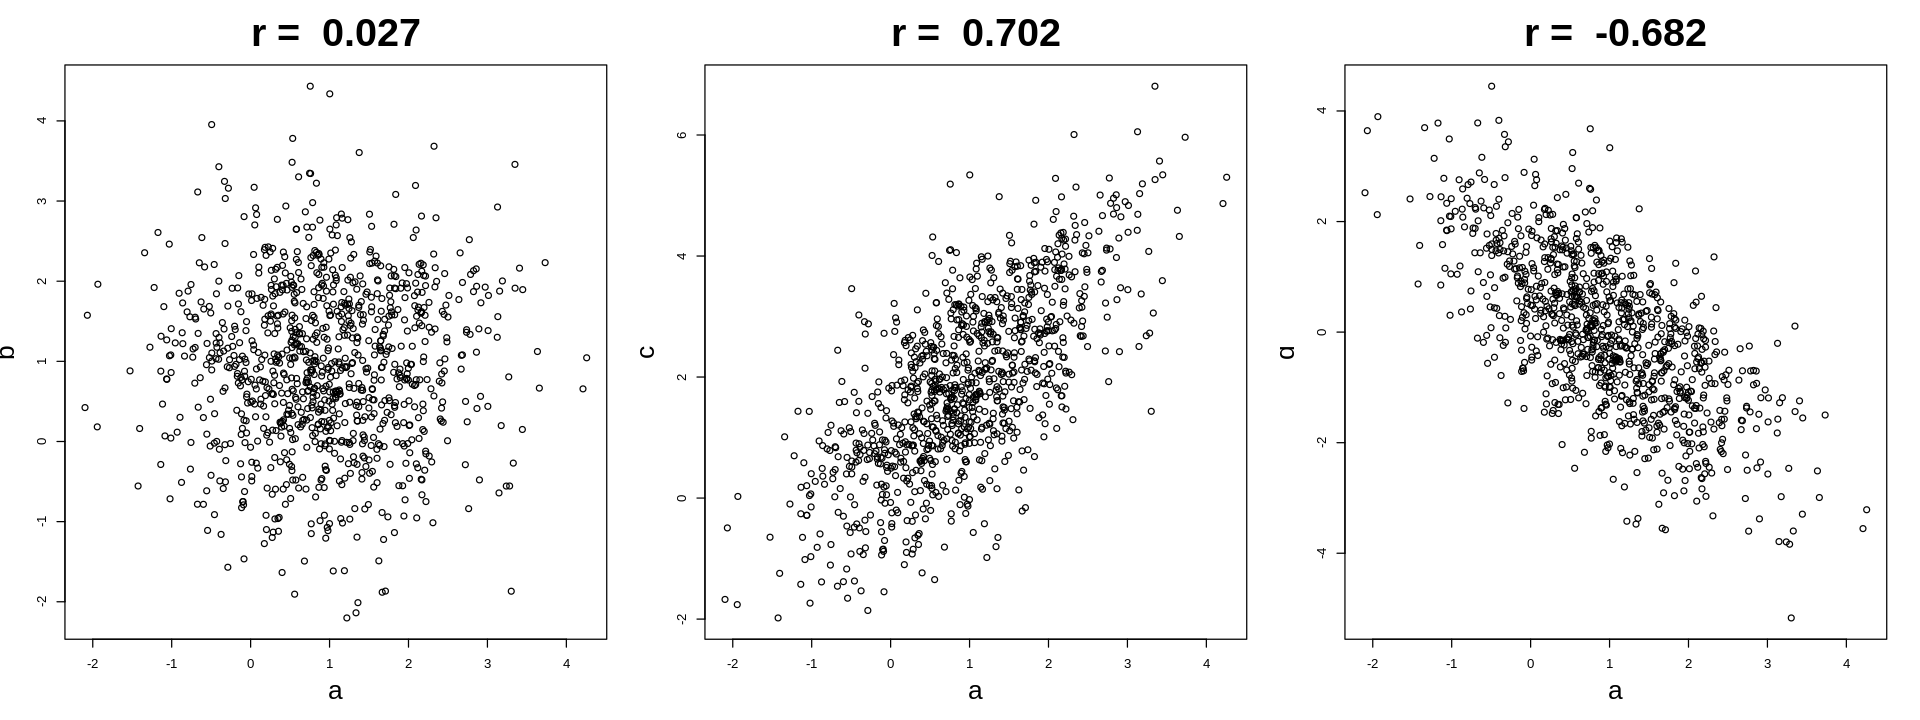

In [65]:
# let's look at some data and their correlation coefficients

# function to change the figure width and height ratio
fig <- function(width, heigth){
     options(repr.plot.width=width, repr.plot.height=heigth)
}

fig(16, 6)

par(mfrow=c(1,3), cex.main=3, cex.lab=2) 


# no correlation
a <- rnorm(1000, 1, 1)
b <- rnorm(1000, 1, 1)
r <- cor(a, b)
plot(a, b, main=paste("r = ", round(r, 3)))

# positive correlation
c <- a + b
r <- cor(a, c)
plot(a, c, main=paste("r = ", round(r, 3)))

# negative correlation
d <- b - a
r <- cor(a, d)
plot(a, d, main=paste("r = ", round(r, 3)))

In [67]:
# lets' try an example: find a correlation between mpg and wt columns

df <- mtcars
head(df, 5)

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Mazda RX4,21.0,6,160,110,3.90,2.620,16.46,0,1,4,4
Mazda RX4 Wag,21.0,6,160,110,3.90,2.875,17.02,0,1,4,4
Datsun 710,22.8,4,108,93,3.85,2.320,18.61,1,1,4,1
Hornet 4 Drive,21.4,6,258,110,3.08,3.215,19.44,1,0,3,1
Hornet Sportabout,18.7,8,360,175,3.15,3.440,17.02,0,0,3,2


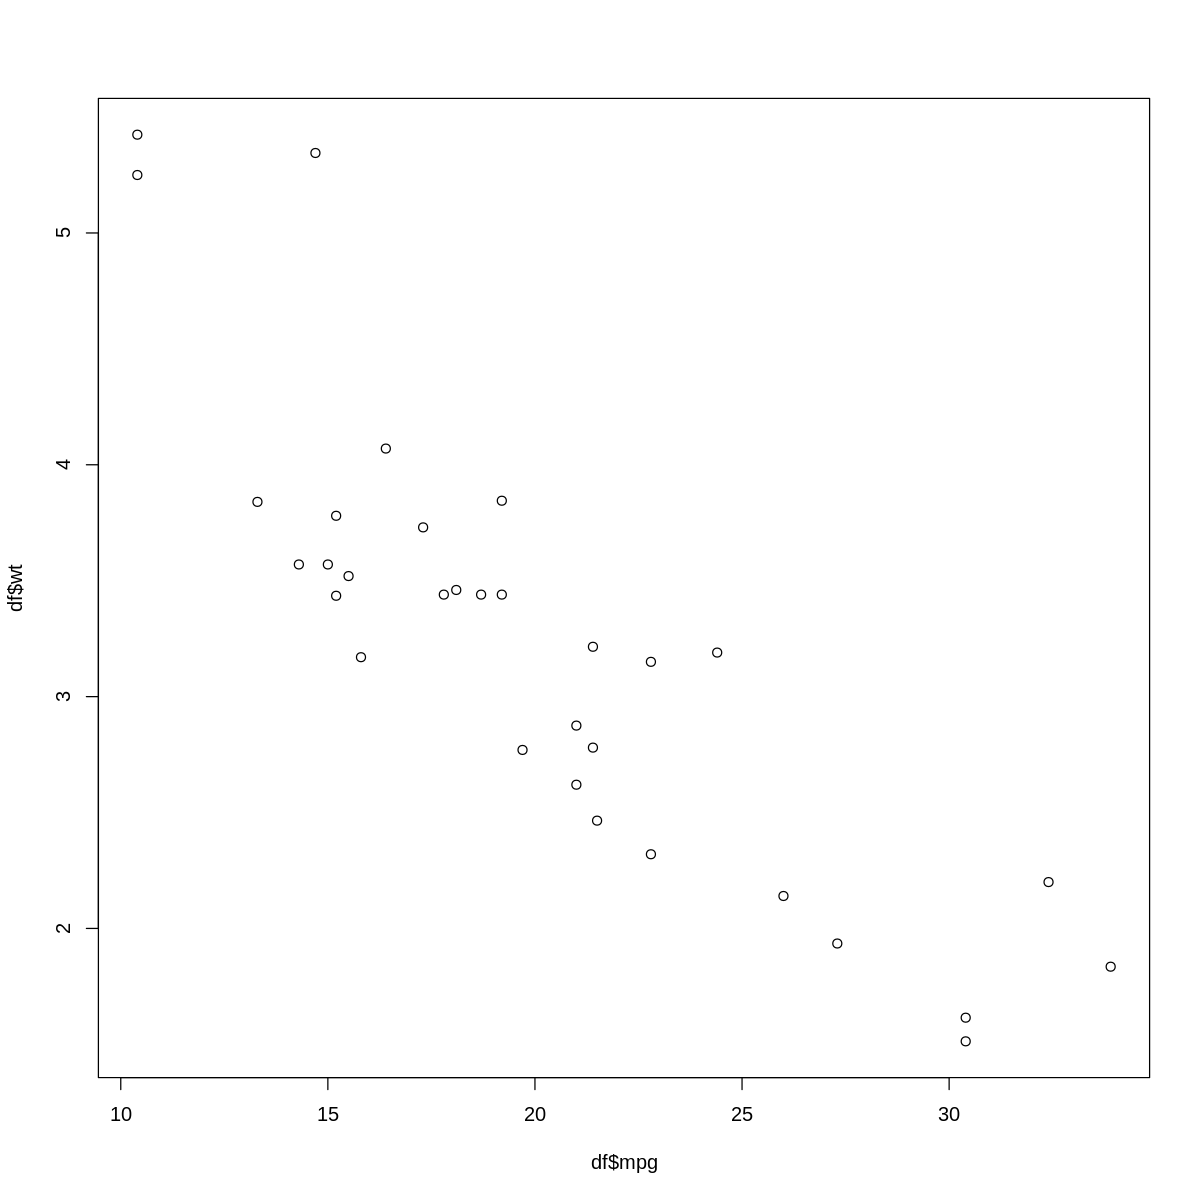

In [76]:
fig(10, 10)
plot(df$mpg, df$wt)

In [69]:
# first let's check for normality of the data distributions
shapiro.test(df$mpg)
shapiro.test(df$wt)


	Shapiro-Wilk normality test

data:  df$mpg
W = 0.94756, p-value = 0.1229



	Shapiro-Wilk normality test

data:  df$wt
W = 0.94326, p-value = 0.09265


We can accept null hypothesis for both cases (p-val > 0.05), that the data are normaly distributed and reject alternative hypothesis, the data are not normaly distributed.

In [70]:
r <- cor.test(df$mpg, df$wt, method = 'pearson')
r


	Pearson's product-moment correlation

data:  df$mpg and df$wt
t = -9.559, df = 30, p-value = 1.294e-10
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.9338264 -0.7440872
sample estimates:
       cor 
-0.8676594 


In [5]:
# https://rpkgs.datanovia.com/ggpubr/
install.packages('ggpubr')
library("ggpubr")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘numDeriv’, ‘SparseM’, ‘MatrixModels’, ‘minqa’, ‘nloptr’, ‘RcppEigen’, ‘carData’, ‘abind’, ‘pbkrtest’, ‘quantreg’, ‘lme4’, ‘Rcpp’, ‘corrplot’, ‘car’, ‘ggrepel’, ‘ggsci’, ‘cowplot’, ‘ggsignif’, ‘gridExtra’, ‘polynom’, ‘rstatix’


Loading required package: ggplot2



`geom_smooth()` using formula = 'y ~ x'


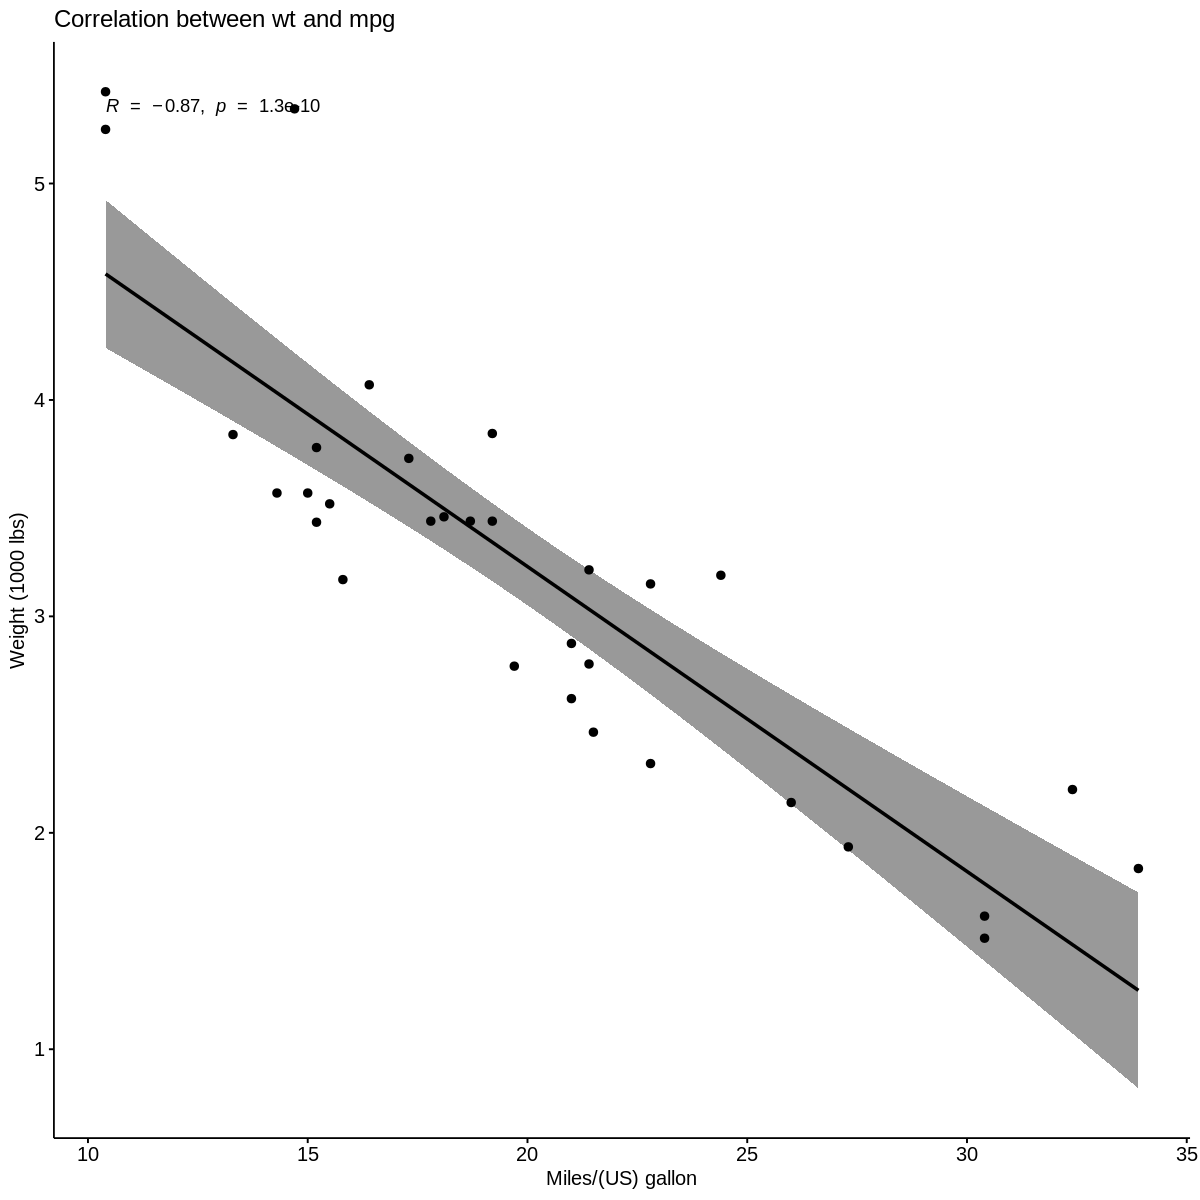

In [74]:
fig(10, 10)
ggscatter(df, x = "mpg", y = "wt", 
          add = "reg.line", conf.int = TRUE, 
          cor.coef = TRUE, cor.method = "pearson",
          title = 'Correlation between wt and mpg', xlab = "Miles/(US) gallon", ylab = "Weight (1000 lbs)")

In [24]:
# R squared

rsq <- function (x, y) cor(x, y) ^ 2
rsq(df$mpg, df$wt)

[1] 0.7528328

## Correlation matrix

Correlation matrix is used to investigate relationship between more variables. For example columns in a dataframe or matrix.

In [69]:
data("mtcars")
df <- mtcars[, c(1,3,4,5,6,7)]

data_cor <- round(cor(df,  method = 'pearson'), 2)
data_cor

,mpg,disp,hp,drat,wt,qsec
mpg,1.00,-0.85,-0.78,0.68,-0.87,0.42
disp,-0.85,1.00,0.79,-0.71,0.89,-0.43
hp,-0.78,0.79,1.00,-0.45,0.66,-0.71
drat,0.68,-0.71,-0.45,1.00,-0.71,0.09
wt,-0.87,0.89,0.66,-0.71,1.00,-0.17
qsec,0.42,-0.43,-0.71,0.09,-0.17,1.00


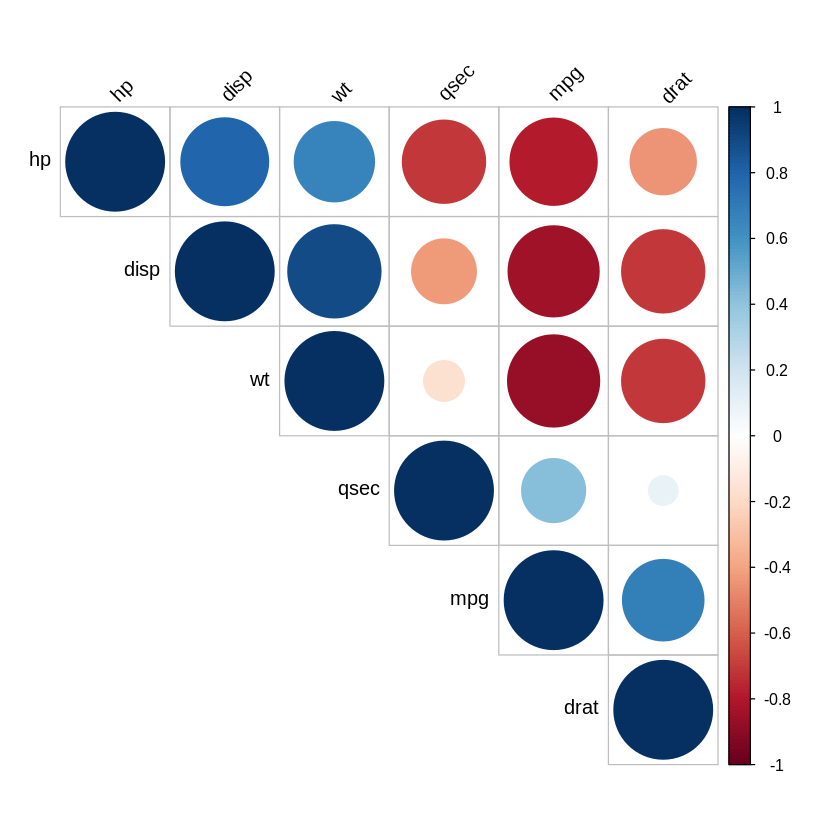

In [70]:
library(corrplot)

corrplot(data_cor, type = "upper", order = "hclust", 
         tl.col = "black", tl.srt = 45)

In [73]:
# covariance matrix

data_cov <- round(cov(df), 2)
data_cov

,mpg,disp,hp,drat,wt,qsec
mpg,36.32,-633.10,-320.73,2.20,-5.12,4.51
disp,-633.10,15360.80,6721.16,-47.06,107.68,-96.05
hp,-320.73,6721.16,4700.87,-16.45,44.19,-86.77
drat,2.20,-47.06,-16.45,0.29,-0.37,0.09
wt,-5.12,107.68,44.19,-0.37,0.96,-0.31
qsec,4.51,-96.05,-86.77,0.09,-0.31,3.19


In [74]:
# covariance to correlation 

cov2cor(data_cov)

,mpg,disp,hp,drat,wt,qsec
mpg,1.0000000,-0.8476030,-0.7762070,0.67787679,-0.8670845,0.41899446
disp,-0.8476030,1.0000000,0.7909485,-0.70509236,0.8867323,-0.43390546
hp,-0.7762070,0.7909485,1.0000000,-0.44553085,0.6578082,-0.70857387
drat,0.6778768,-0.7050924,-0.4455309,1.00000000,-0.7012407,0.09357249
wt,-0.8670845,0.8867323,0.6578082,-0.70124069,1.0000000,-0.17714575
qsec,0.4189945,-0.4339055,-0.7085739,0.09357249,-0.1771457,1.00000000


## 2. Spearman's rank correlation coefficient

Also called Spearman's rho is a nonparametric measure of statistical dependence between the rankings of two variables that assesses how well can be relationship between two sets of random variables described by a monotonic function. Similar to Pearson's correlation coefficient the value of the coefficient can lay between -1 and 1. Where -1 means a strong negative correlation, zero means no correlation and 1 a strong positive correlation.
<br><br>

$
 \rho = \frac{cov(R(X), R(Y))}{\sigma_{R(X)} \sigma_{R(Y)}}
$
<br>

Where $X_i$, $Y_i$ are converted to ranks $R(X_i)$, $R(Y_i)$.
<br>
Spearman's coefficent can be used both for continuous and discrete variables.

[1] "Spearman's correlation coefficient =  1"


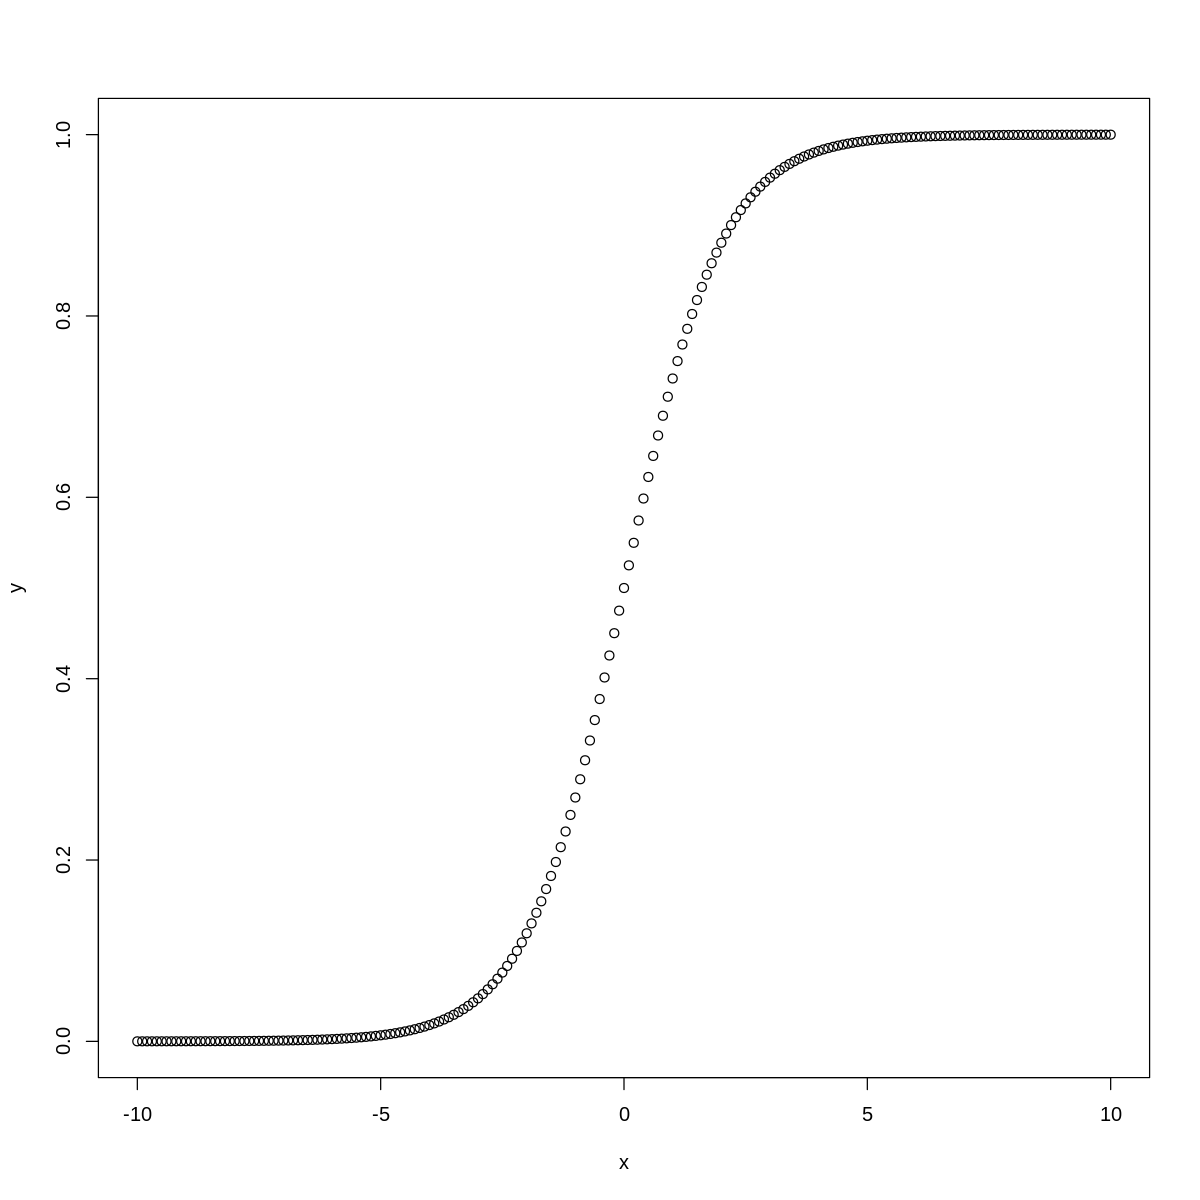

In [102]:
# example

sigmoid <- function(x) {1 / (1 + exp(-x))}
x <- seq(-10, 10, 0.1)
y <- sigmoid(x)
plot(x, y)

# compute Spearman's correlation coefficient
rho <- cor(x, y, method = 'spearman')

print(paste("Spearman's correlation coefficient = ", rho))

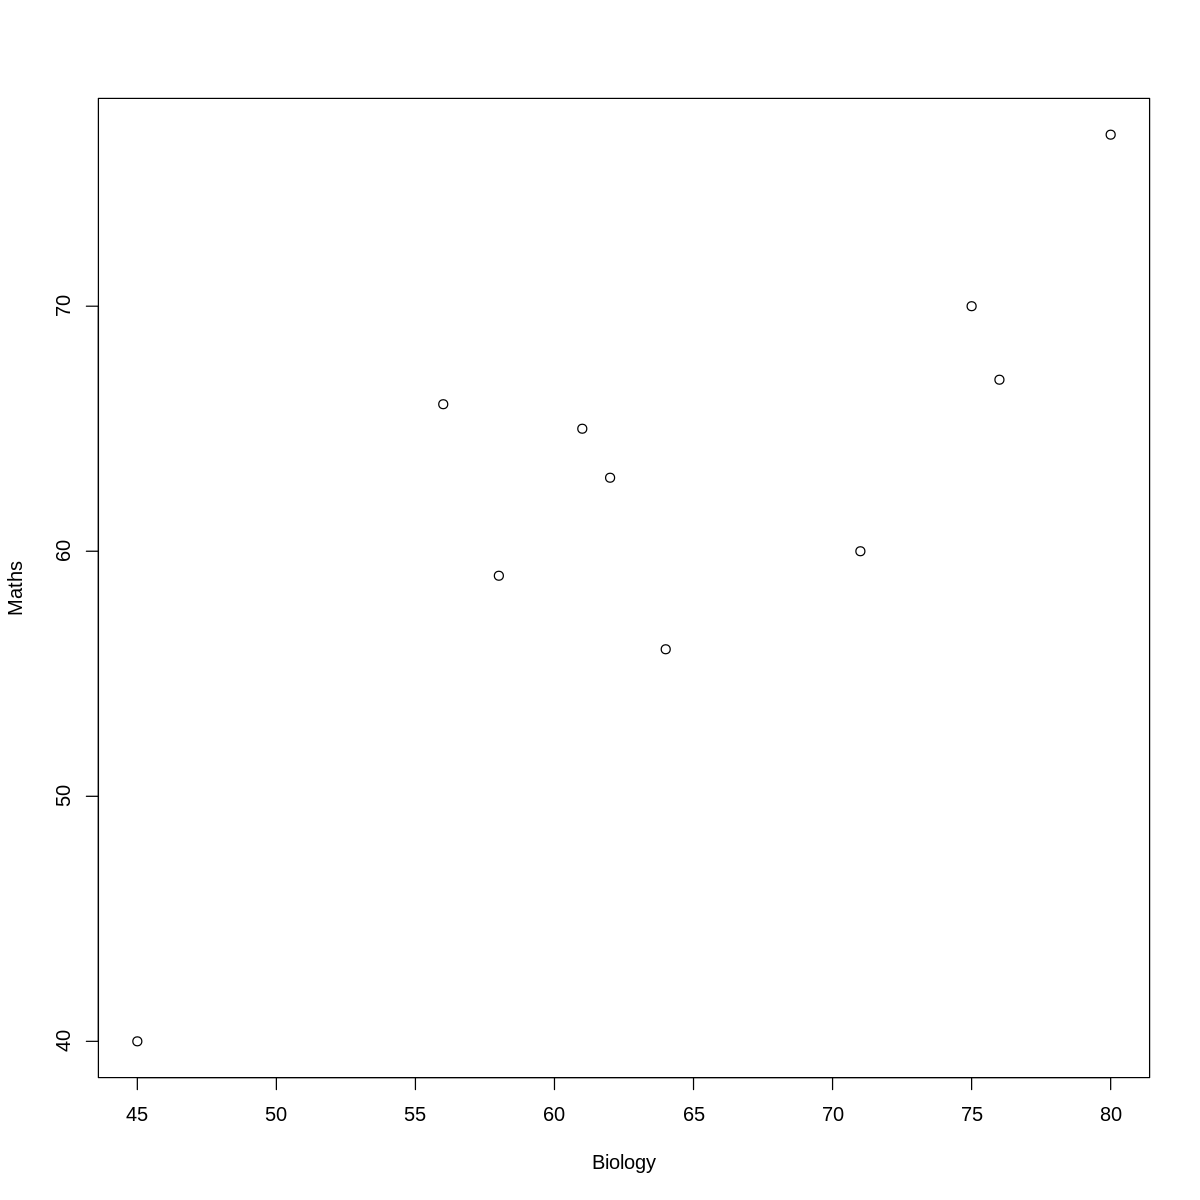

In [125]:
# Exercise: perform a correlation analysis on the following dataset

Biology <- 	c(56,	75,	45, 71, 61, 64, 58, 80,	76,	62)
Maths <-	c(66,	70,	40,	60,	65,	56,	59,	77,	67,	63)

plot(Biology, Maths)

In [126]:
shapiro.test(Biology)
shapiro.test(Maths)


	Shapiro-Wilk normality test

data:  Biology
W = 0.96307, p-value = 0.8202



	Shapiro-Wilk normality test

data:  Maths
W = 0.92255, p-value = 0.3787


In [127]:
rho <- cor(Biology, Maths, method = 'spearman')
print(paste("Spearman's correlation coefficient = ", round(rho, 2)))

cor.test(Biology, Maths, method = 'spearman')

[1] "Spearman's correlation coefficient =  0.66"



	Spearman's rank correlation rho

data:  Biology and Maths
S = 56, p-value = 0.04403
alternative hypothesis: true rho is not equal to 0
sample estimates:
      rho 
0.6606061 


In [128]:
r <- cor(Biology, Maths, method = 'pearson')
print(paste("Pearson's correlation coefficient = ", round(r, 2)))

cor.test(Biology, Maths, method = 'pearson')

[1] "Pearson's correlation coefficient =  0.8"



	Pearson's product-moment correlation

data:  Biology and Maths
t = 3.8213, df = 8, p-value = 0.00508
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.3525910 0.9517453
sample estimates:
      cor 
0.8037781 


In [8]:
# Example: 
# two organic chemist were suppose to order 12 molecules by how easy can be molecules , compute a correlation score
# to assess how much their opinion differs

chem_1 <- c(1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12)
chem_2 <- c(1, 2, 4, 3, 5, 6, 8, 9, 7, 11, 10, 12)

rho <- cor(chem_1, chem_2, method = 'spearman')
print(paste("Spearman's correlation coefficient = ", round(rho, 2)))

cor.test(chem_1, chem_2, method = 'spearman')

[1] "Spearman's correlation coefficient =  0.97"



	Spearman's rank correlation rho

data:  chem_1 and chem_2
S = 10, p-value < 2.2e-16
alternative hypothesis: true rho is not equal to 0
sample estimates:
     rho 
0.965035 


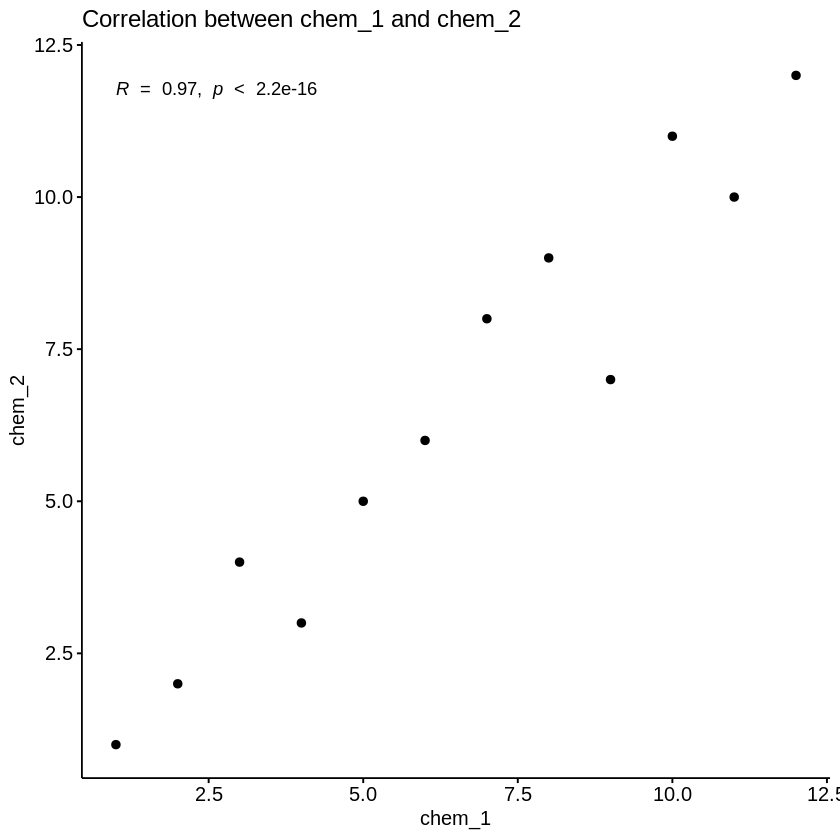

In [40]:
ggscatter(data.frame(chem_1, chem_2), x = "chem_1", y = "chem_2", 
          add = "loess", conf.int = TRUE, 
          cor.coef = TRUE, cor.method = "spearman",
          title = 'Correlation between chem_1 and chem_2')

# Kendall's tau

Similar to Spearman's rho Kendall tau assess statistical associations based on the ranks of the data. Tau calculation is based on concordant and discordant pairs. 
<br><br>

$ 
 \tau ={\frac {2}{n(n-1)}}\sum _{i<j} sgn(x_{i}-x_{j})sgn(y_{i}-y_{j})
$
<br><br><br>

$\tau _{A}$ for ordinal values :<br><br>
<br>
$
\tau _{A}={\frac {n_{c}-n_{d}}{n_{0}}}
$
<br><br><br>

$\tau _{B}$ that makes adjustment for ties:<br><br>
<br>

$
\tau _{B}={\frac {n_{c}-n_{d}}{\sqrt {(n_{0}-n_{1})(n_{0}-n_{2})}}}
$
<br><br><br>

And $tau_c$ that is suitable for rectangular contingency tables:
<br>
$
 \tau _{C}={\frac {2(n_{c}-n_{d})}{n^{2}{\frac {(m-1)}{m}}}}
$
<br><br>

<br>
Where:
<br><br>
$
n_0 = n(n - 1)/2
$
<br>

$
n_1 = \sum_i t_i(ti -1) / 2
$
<br>

$
n_2 = \sum_j u_u(uj -1) / 2
$
<br>

$n_c = $ Number of concordant pairs
<br>

$n_d = $ Number of discordant pairs
<br>

$t_i = $ Number of tied values in th $i^{th}$ group of ties for the first quantity
<br>

$u_j = $  Number of tied values in th $j^{th}$ group of ties for the second quantity<br>

$r = $ Number of rows
<br>

$c = $ Number of columns
<br>

$m = $ min(r, c)
<br><br>
Again correlation coefficient value can lay between -1 and 1. Where -1 means a strong negative correlation, zero means no correlation and 1 a strong positive correlation.

### Differences between Kendall's tau and Spearman's rho
<br>

*   Kendall's tau is easily interpreted in terms of the probabilities of observing concordant and discordant pairs
*   Spearman's rho can be used also for continuous values
*   Spearman's rho usualy have larger values and is more sensitive to errors in the data - calculation is based on deviations


In [10]:
chem_1 <- c(1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12)
chem_2 <- c(1, 2, 4, 3, 5, 6, 8, 9, 7, 11, 10, 12)

tau <- cor(chem_1, chem_2, method = 'kendall')
print(paste("Kendall's tau correlation coefficient = ", round(tau, 2)))

cor.test(chem_1, chem_2, method = 'kendall')

[1] "Kendall's tau correlation coefficient =  0.88"



	Kendall's rank correlation tau

data:  chem_1 and chem_2
T = 62, p-value = 5.319e-06
alternative hypothesis: true tau is not equal to 0
sample estimates:
      tau 
0.8787879 


`geom_smooth()` using formula = 'y ~ x'


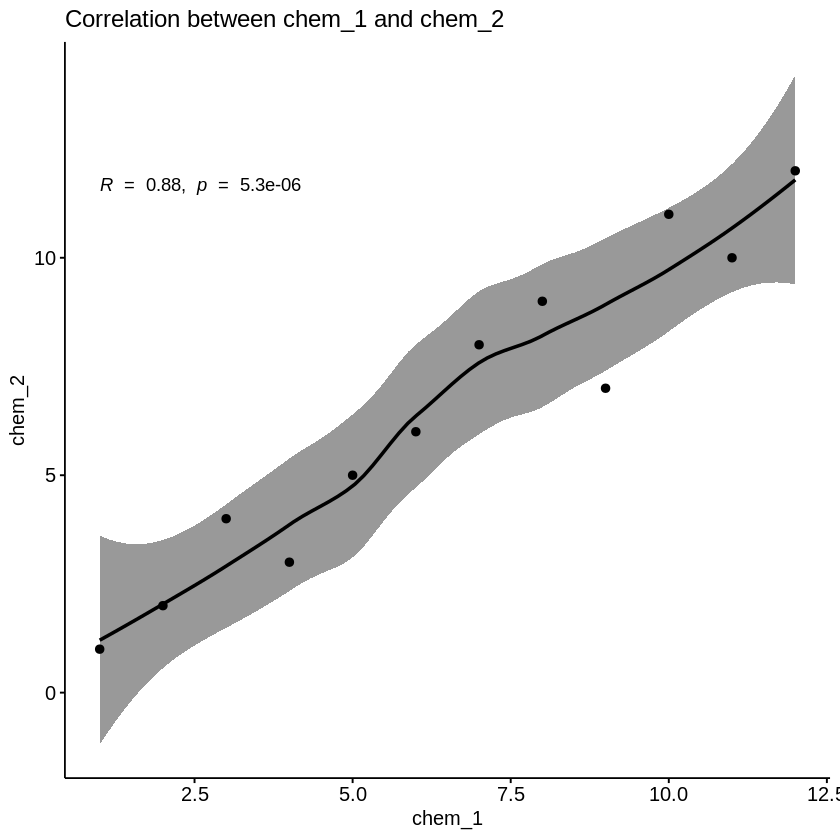

In [38]:
ggscatter(data.frame(chem_1, chem_2), x = "chem_1", y = "chem_2", 
          add = "loess", conf.int = TRUE, 
          cor.coef = TRUE, cor.method = "kendall",
          title = 'Correlation between chem_1 and chem_2')

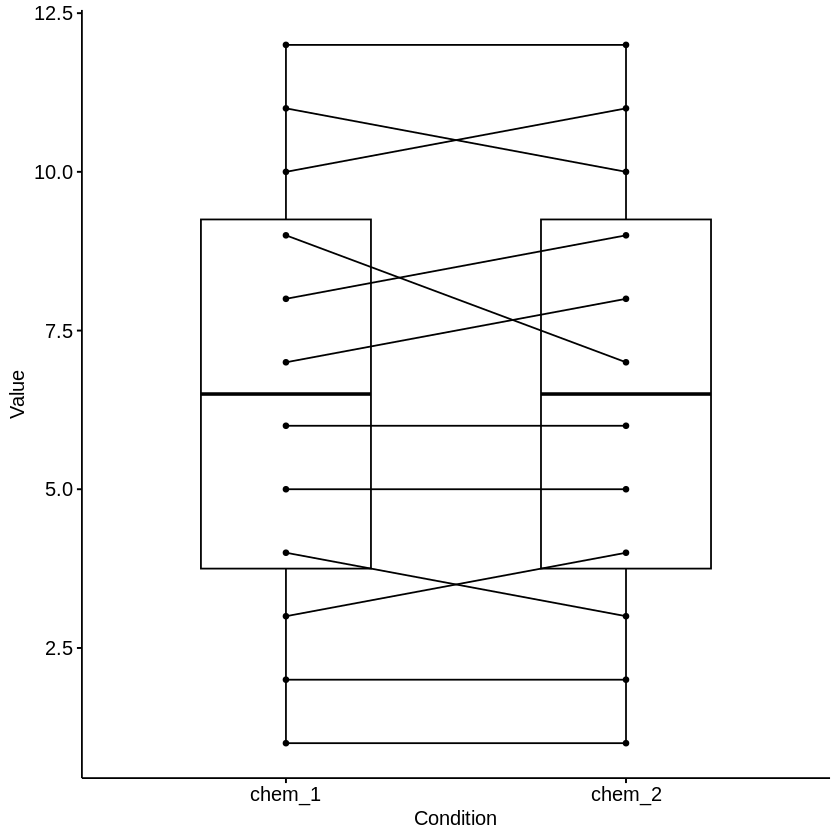

In [13]:
ggpaired(data.frame(chem_1, chem_2), cond1 = "chem_1", cond2 = "chem_2",)

### Example:
Find a correlation coefficient between whiskey's age and price:

In [60]:
age <- c(1,	5,	4,	2,	6,	3, 7)
price <-	c(79,	160,	125,	105,	214,	103, 320)

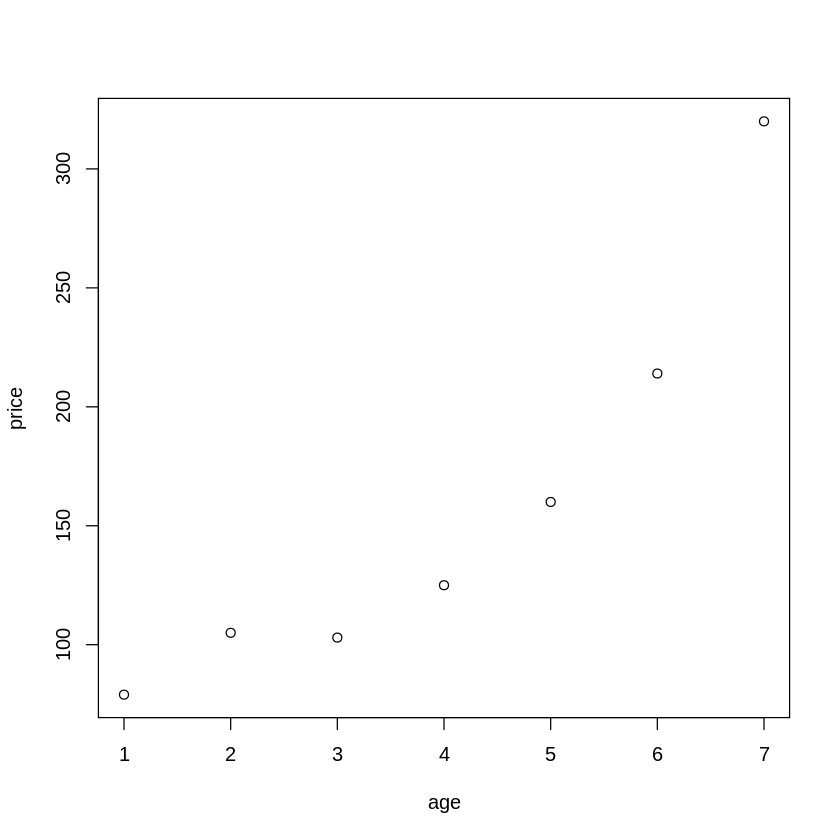

In [61]:
plot(age, price)

`geom_smooth()` using formula = 'y ~ x'


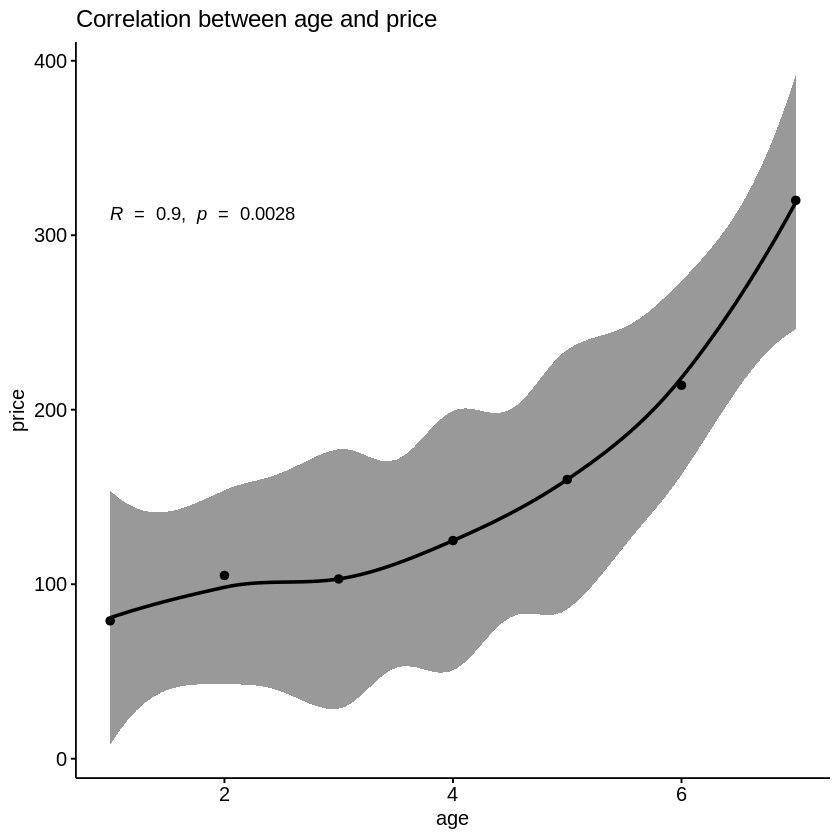

In [63]:
ggscatter(data.frame(age, price), x = "age", y = "price", 
          add = "loess", conf.int = TRUE, 
          cor.coef = TRUE, cor.method = "kendall",
          title = 'Correlation between age and price')

### Correlation is not a causation
https://www.datasciencecentral.com/spurious-correlations-15-examples/

![Image](https://www.datasciencecentral.com/wp-content/uploads/2021/10/2808309983.png)

### Confounding variable
Winter hat sales correlate with the frequency of frostbite, i.e. people who buy thick hats are more likely to get frostbite. (Confounding variable is sweltering cold.)



# PCA - Principal Component Analysis

*PCA is defined as an orthogonal linear transformation that transforms the data to a new coordinate system.* (Wikipedia)<br>
This procedure can be used for dimensionality reduction and thus betters interpretability of the large datasets.


![image](https://www.sartorius.com/resource/blob/545520/2003e21209fe4beb0f98c9b3689a1cb8/blog-photo-b24-2-figure-3-data.jpg)
from: https://www.sartorius.com/en/knowledge/science-snippets/what-is-principal-component-analysis-pca-and-how-it-is-used-507186


Computation procedure:
1. Normalize the data
2. Compute the covariance matrix
3. Calculate the eigenvalues and eigenvectors
4. Choose components and form a feature vector
5. Form principal component

[1] "sdev"     "rotation" "center"   "scale"    "x"

Importance of components:
                          PC1    PC2     PC3     PC4     PC5     PC6    PC7
Standard deviation     2.5707 1.6280 0.79196 0.51923 0.47271 0.46000 0.3678
Proportion of Variance 0.6008 0.2409 0.05702 0.02451 0.02031 0.01924 0.0123
Cumulative Proportion  0.6008 0.8417 0.89873 0.92324 0.94356 0.96279 0.9751
                           PC8    PC9    PC10   PC11
Standard deviation     0.35057 0.2776 0.22811 0.1485
Proportion of Variance 0.01117 0.0070 0.00473 0.0020
Cumulative Proportion  0.98626 0.9933 0.99800 1.0000

Standard deviations (1, .., p=11):
 [1] 2.5706809 1.6280258 0.7919579 0.5192277 0.4727061 0.4599958 0.3677798
 [8] 0.3505730 0.2775728 0.2281128 0.1484736

Rotation (n x k) = (11 x 11):
            PC1         PC2         PC3          PC4         PC5         PC6
mpg  -0.3625305  0.01612440 -0.22574419 -0.022540255  0.10284468 -0.10879743
cyl   0.3739160  0.04374371 -0.17531118 -0.002591838  0.05848381  0.16855369
disp  0.3681852 -0.04932413 -0.06148414  0.256607885  0.39399530 -0.33616451
hp    0.3300569  0.24878402  0.14001476 -0.067676157  0.54004744  0.07143563
drat -0.2941514  0.27469408  0.16118879  0.854828743  0.07732727  0.24449705
wt    0.3461033 -0.14303825  0.34181851  0.245899314 -0.07502912 -0.46493964
qsec -0.2004563 -0.46337482  0.40316904  0.068076532 -0.16466591 -0.33048032
vs   -0.3065113 -0.23164699  0.42881517 -0.214848616  0.59953955  0.19401702
am   -0.2349429  0.42941765 -0.20576657 -0.030462908  0.08978128 -0.57081745
gear -0.2069162  0.46234863  0.28977993 -0.2

[1] 32 11

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11
Mazda RX4,-0.6468627420,1.7081142,-0.5917309,0.113702214,-0.945523363,-0.0169873733,-0.42648652,-0.009631217,0.14642303,-0.06670350,0.179693570
Mazda RX4 Wag,-0.6194831460,1.5256219,-0.3763013,0.199121210,-1.016680740,-0.2417246434,-0.41620046,-0.084520213,0.07452829,-0.12692766,0.088644265
Datsun 710,-2.7356242748,-0.1441501,-0.2374391,-0.245215450,0.398762288,-0.3487678138,-0.60884146,0.585255765,-0.13122859,0.04573787,-0.094632914
Hornet 4 Drive,-0.3068606268,-2.3258038,-0.1336213,-0.503800355,0.549208936,0.0192969984,-0.04036075,-0.049583029,0.22021812,-0.06039981,0.147611269
Hornet Sportabout,1.9433926844,-0.7425211,-1.1165366,0.074461963,0.207515698,0.1491927606,0.38350816,-0.160297757,-0.02117623,-0.05983003,0.146406899
Valiant,-0.0552534228,-2.7421229,0.1612456,-0.975167425,0.211665375,-0.2438358546,-0.29464160,0.256612420,-0.03222907,-0.20165466,0.019545064
Duster 360,2.9553851233,0.3296133,-0.3570461,-0.051529216,0.343847875,0.7126920868,-0.13607792,-0.171103449,-0.17844547,0.36086641,0.171863162
Merc 240D,-2.0229593244,-1.4421056,0.9290295,-0.142129082,-0.316651386,-0.0009889391,0.63946214,0.163156195,0.37698418,0.29086529,-0.019090358
Merc 230,-2.2513839535,-1.9522879,1.7689364,0.287210957,-0.333682355,-0.3338703384,0.62201034,-0.105779936,-0.86455356,-0.11597058,0.159688512
Merc 280,-0.5180912217,-0.1594610,1.4692603,0.066263362,-0.069624161,0.8165308365,0.16117090,0.099983313,0.54092449,-0.22093750,-0.124486227


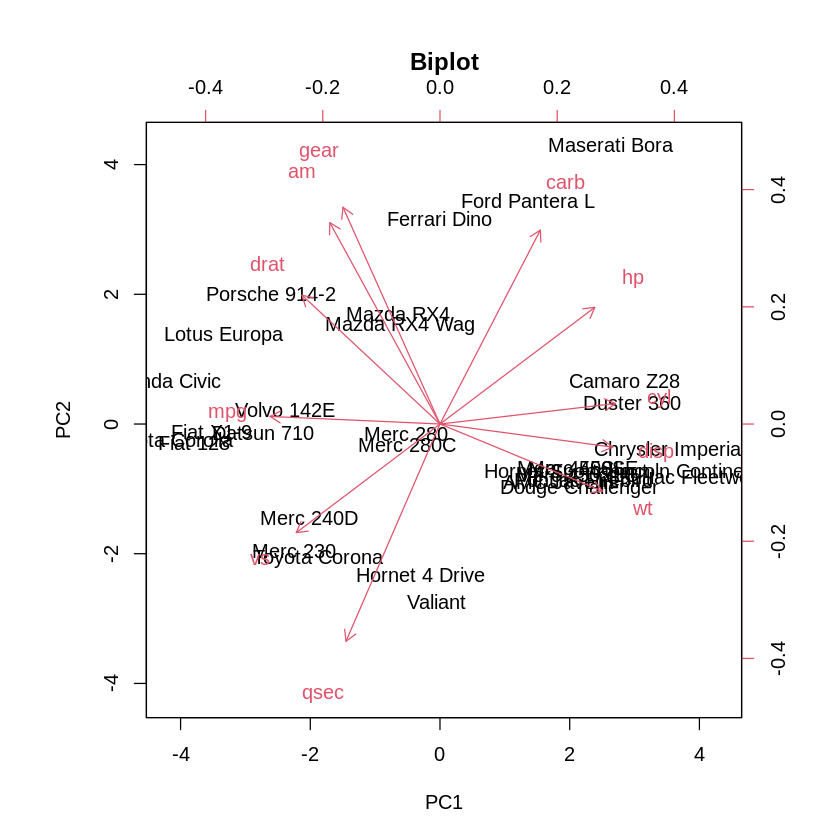

In [151]:
data(mtcars)

cars_pca <- prcomp(mtcars, scale = TRUE,
                center = TRUE, retx = T)
names(cars_pca)
 
# Summary
summary(cars_pca)
cars_pca
 
# See the principal components
dim(cars_pca$x)
cars_pca$x
 
biplot(cars_pca, main = "Biplot", scale = 0)

Interpretation: First principal component has the most variability of the data, in this plot is associated with variable hp, wt and large negative association with mpg variable. The second principal component, that is orthogonal on the first one has the largest positiva association with gear and am, we can also see large negative association with qsec.
<br>
Variables description:<br>
https://rstudio-pubs-static.s3.amazonaws.com/61800_faea93548c6b49cc91cd0c5ef5059894.html


### Scree plot

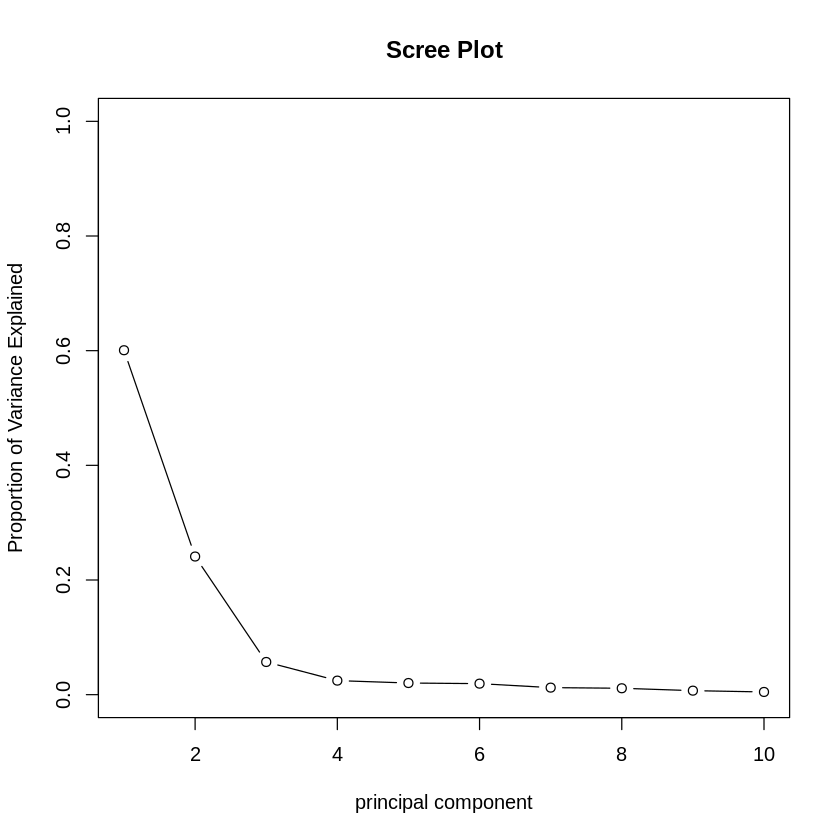

In [156]:
var_explained <- cars_pca$sdev^2 / sum(cars_pca$sdev^2)

plot(var_explained[1:10], xlab = "principal component",
            ylab = "Proportion of Variance Explained",
            ylim = c(0, 1), type = "b",
            main = "Scree Plot")

In [147]:
# Example:
url <- 'https://raw.githubusercontent.com/kamclar/statisticka_analyza_dat_cviceni/main/data/mass_spec_data.csv'
ms_data <- read.csv(url)[,2:17]
col_names <- colnames(ms_data)
head(ms_data)
dim(ms_data)
col_names

,ADC1,ADC2,ADC3,ADC4,F1,F2,F3,F4,KE1,KE2,KE3,KE4,W1,W2,W3,W4
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,31.46710,31.44211,31.46406,31.38592,31.12878,31.33996,31.17926,31.40090,30.87282,30.45621,30.75762,30.71405,31.40225,31.17661,31.15210,31.21154
2,23.84489,24.39633,24.01765,24.07163,26.13439,26.54560,26.24179,26.73902,24.37927,24.80808,24.51770,24.59406,23.63011,23.86092,24.09551,23.72145
3,29.68486,29.49483,29.48526,29.59326,30.48670,30.97726,31.09435,30.79299,29.63296,29.55393,29.47020,29.52260,29.78704,29.92715,30.05313,29.95878
4,29.81465,29.73314,29.82785,30.04096,29.27249,29.08607,28.82685,29.86249,29.17961,29.01286,29.44889,29.30304,29.68636,29.83391,29.61451,29.49122
5,29.32171,29.09674,29.13627,29.31078,29.27937,29.32464,29.30266,27.78963,28.50300,28.69854,28.57721,28.41915,29.55841,29.40702,29.47163,29.88504
6,26.43352,26.61771,26.28527,27.08250,26.97804,27.13504,26.71180,26.92042,25.52375,25.73314,26.30327,25.81165,26.52191,26.83561,26.62514,26.62985


[1] 3712   16

[1] "ADC1" "ADC2" "ADC3" "ADC4" "F1"   "F2"   "F3"   "F4"   "KE1"  "KE2" 
[11] "KE3"  "KE4"  "W1"   "W2"   "W3"   "W4"

In [82]:
library(dplyr)


In [132]:
data_pca <- prcomp(t(ms_data), scale = TRUE, center = TRUE, retx = T)


In [133]:
names(data_pca)

[1] "sdev"     "rotation" "center"   "scale"    "x"

[1] 16

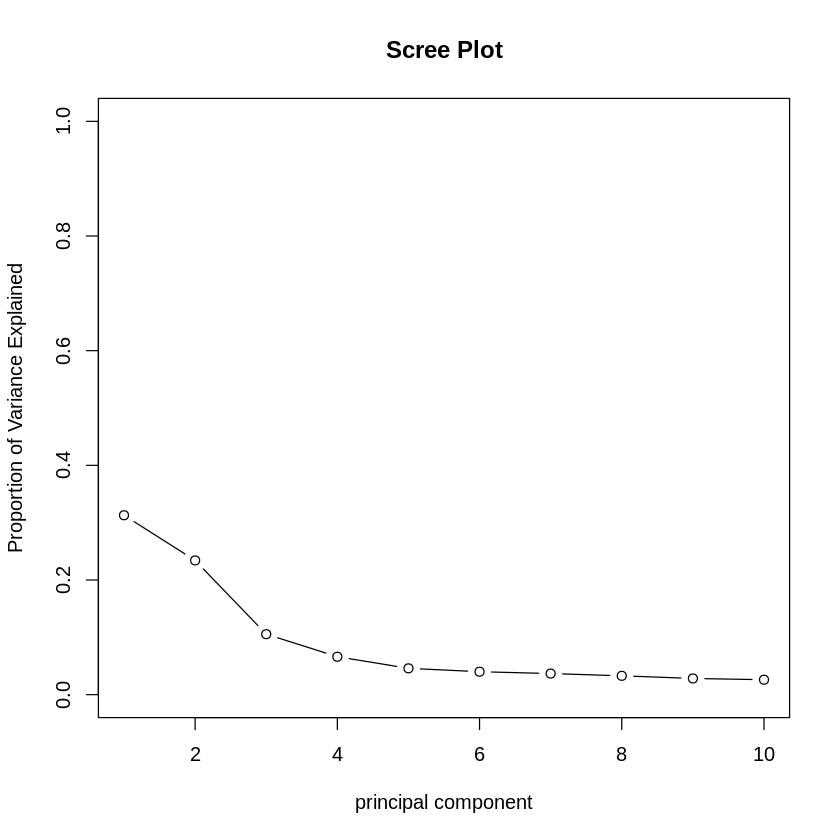

In [157]:
# compute variance for each component
var_explained <- data_pca$sdev^2 / sum(data_pca$sdev^2)
length(var_explained)

# Plot variance explained for each principal component
plot(var_explained[1:10], xlab = "principal component",
            ylab = "Proportion of Variance Explained",
            ylim = c(0, 1), type = "b",
            main = "Scree Plot")

In [148]:
groups <- factor(substring(col_names, 1, nchar(col_names)-1))

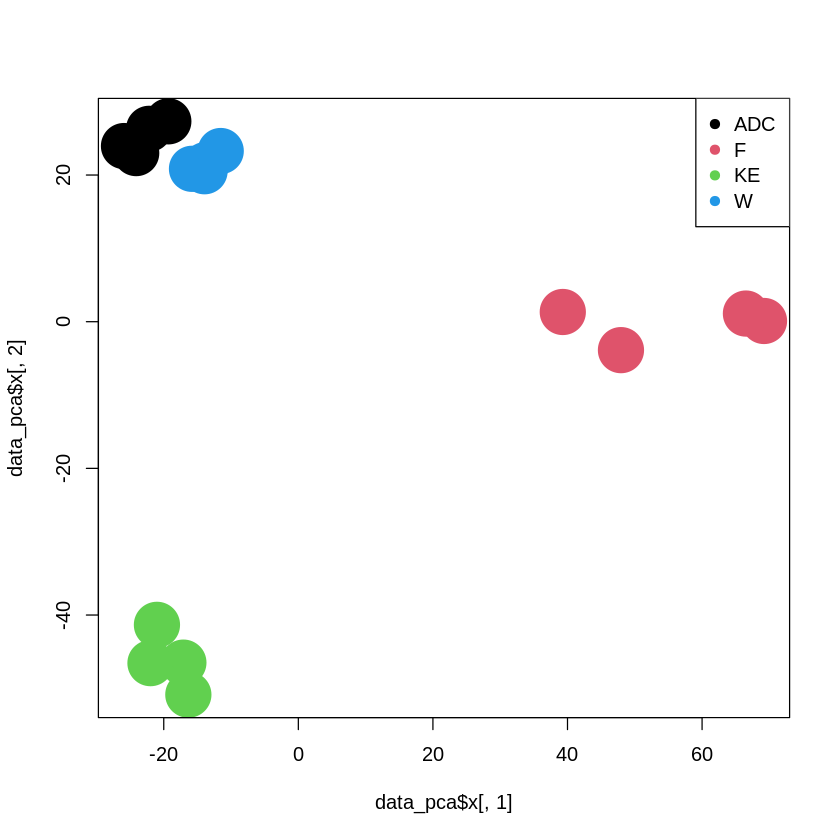

In [150]:
plot(data_pca$x[, 1], data_pca$x[, 2], pch = 19, cex = 5, col = groups)
legend("topright",
       legend = levels(groups),
       pch = 19,
       col = factor(levels(groups)))

# Bonus: Simple Cluster analysis 

In R software cluster analysis can be performed using package stats and cluster, but it usualy involves more steps. In this short demonstration we will use packege factoextra, that offers easy to use wrapper functions.
<br><br>
The simplest classification of clustering methods can be:
*   Hierarchical clustering
*   Non-hieararchical clustering

## Hierarchical clustering

In [158]:
# https://www.rdocumentation.org/packages/factoextra/versions/1.0.7
install.packages('factoextra')
library(factoextra)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘lazyeval’, ‘later’, ‘htmlwidgets’, ‘crosstalk’, ‘promises’, ‘estimability’, ‘mvtnorm’, ‘viridis’, ‘DT’, ‘ellipse’, ‘emmeans’, ‘flashClust’, ‘leaps’, ‘multcompView’, ‘scatterplot3d’, ‘plyr’, ‘dendextend’, ‘FactoMineR’, ‘reshape2’


Welcome! Want to learn more? See two factoextra-related books at https://goo.gl/ve3WBa



In [167]:
df <- data.frame( data_pca$x[, 1], data_pca$x[, 2], data_pca$x[, 3], data_pca$x[, 4])
colnames(df) <- c( 'PC1', 'PC2', 'PC3', 'PC4')
head(df, 5)

,PC1,PC2,PC3,PC4
,<dbl>,<dbl>,<dbl>,<dbl>
ADC1,-25.90765,23.951437,25.4148157,5.1707149
ADC2,-22.17252,26.300288,29.2138627,5.6027657
ADC3,-24.09745,22.993507,29.6121580,5.8055564
ADC4,-19.32255,27.323968,11.1649927,-0.7421351
F1,39.30101,1.325559,0.3406608,8.2003795


In [168]:
data_dist <- get_dist(df, method = "pearson")
head(round(as.matrix(data_dist), 2))[, 1:6]

,ADC1,ADC2,ADC3,ADC4,F1,F2
ADC1,0.00,0.00,0.00,0.08,1.98,1.99
ADC2,0.00,0.00,0.00,0.08,1.96,1.99
ADC3,0.00,0.00,0.00,0.11,1.97,1.99
ADC4,0.08,0.08,0.11,0.00,1.88,1.91
F1,1.98,1.96,1.97,1.88,0.00,0.01
F2,1.99,1.99,1.99,1.91,0.01,0.00


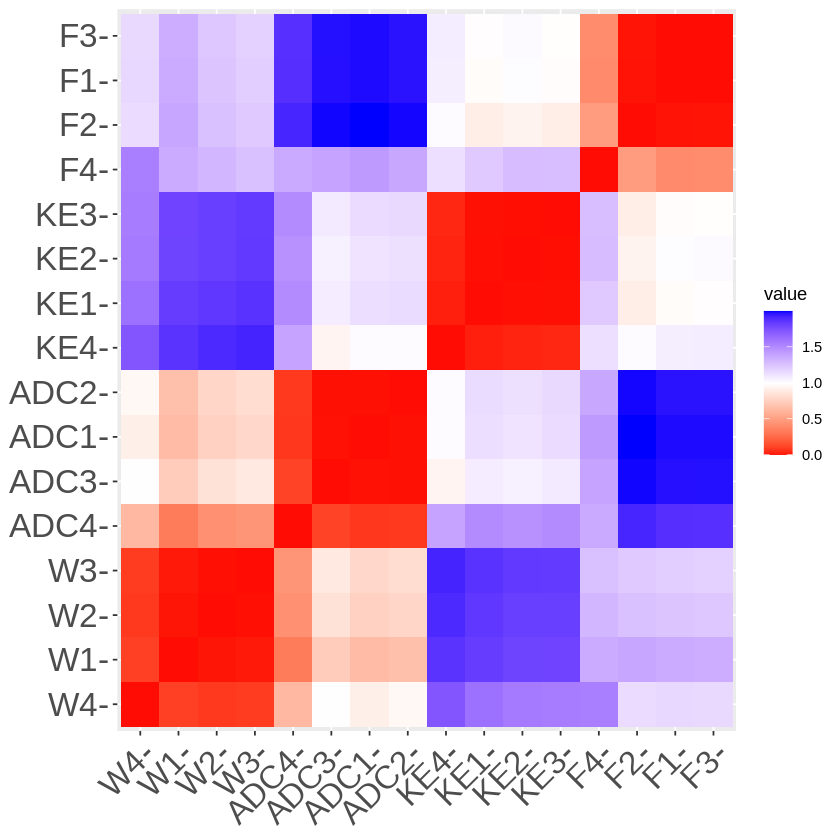

In [170]:
# Visualize the dissimilarity matrix
fviz_dist(data_dist, lab_size = 20)

Colors corresponds to distances between groups, see the legend. Red color indicates small distance between objects, blue indicates large distance.

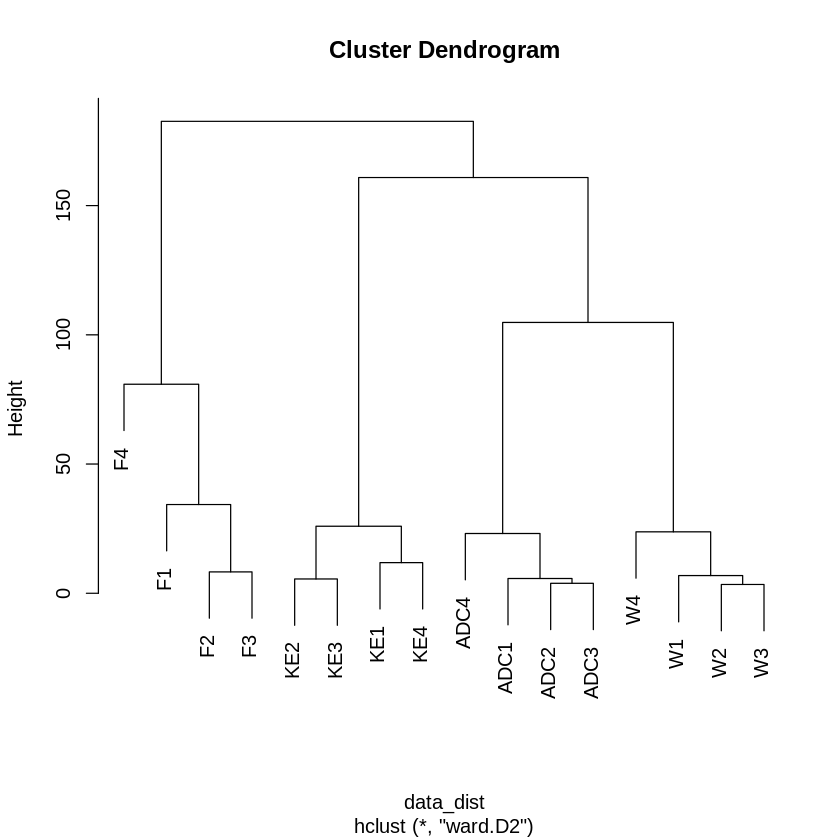

In [177]:
# In case you would like to use standard R procedure for computing hierarchical clustering:

# Compute dissimilarity matrix
data_dist <- dist(df, method = "euclidean") # maximum, manhattan, canberra, binary,  minkowski

# Compute hierarchical clustering
data_clusts <- hclust(data_dist, method = "ward.D2") # single, complete, average, mcquitty, median, centroid

# Visualize
plot(data_clusts, cex = 1)

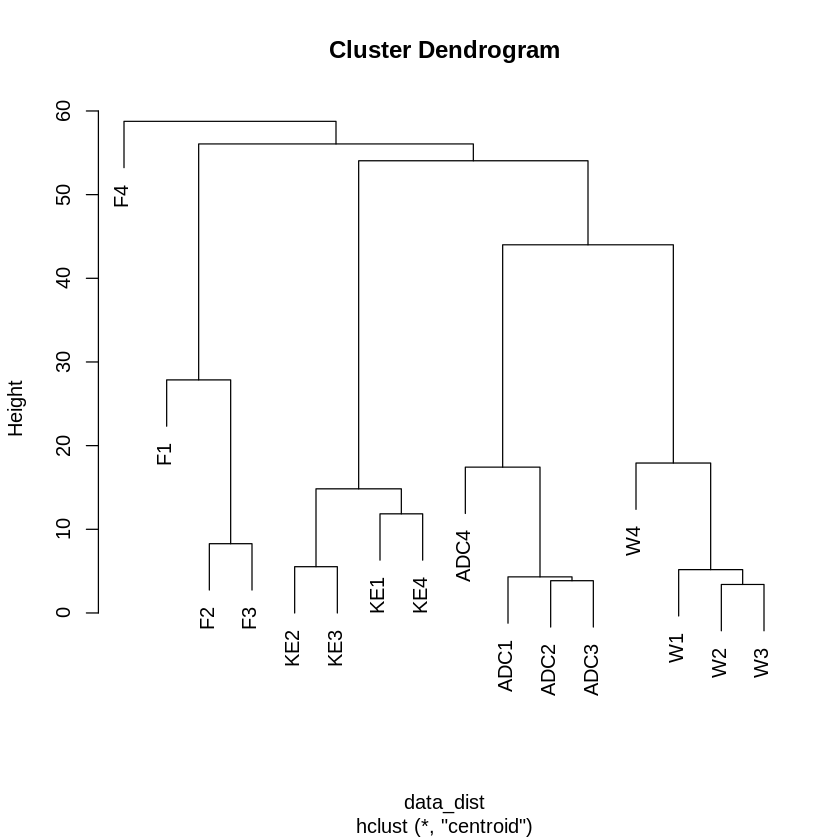

In [179]:
# Compute hierarchical clustering
data_clusts_2 <- hclust(data_dist, method = "centroid") 

# Visualize
plot(data_clusts_2, cex = 1)

Which linkage method we should use? We may try to use so called cophentic correlation coefficient. The better the clustering the better the agreement between distances should be:

In [180]:
# Which clustering method use?
cor(dist(data_dist), cophenetic(data_clusts))
cor(dist(data_dist), cophenetic(data_clusts_2))


[1] 0.9561237

[1] 0.9229029

In [193]:
# enhanced hierarchical clustering using factoextra library

data_clusts <- eclust(df, "hclust") # compute hclust

In [195]:
# Let's check what hclustering method automatic pipeline uses 
names(data_clusts)
data_clusts$method

[1] "merge"       "height"      "order"       "labels"      "method"     
 [6] "call"        "dist.method" "cluster"     "nbclust"     "silinfo"    
[11] "size"        "data"        "gap_stat"

[1] "ward.D2"

In [206]:
data_clusts$cluster

ADC1 ADC2 ADC3 ADC4   F1   F2   F3   F4  KE1  KE2  KE3  KE4   W1   W2   W3   W4 
   1    1    1    2    3    4    4    5    6    7    7    6    8    8    8    9

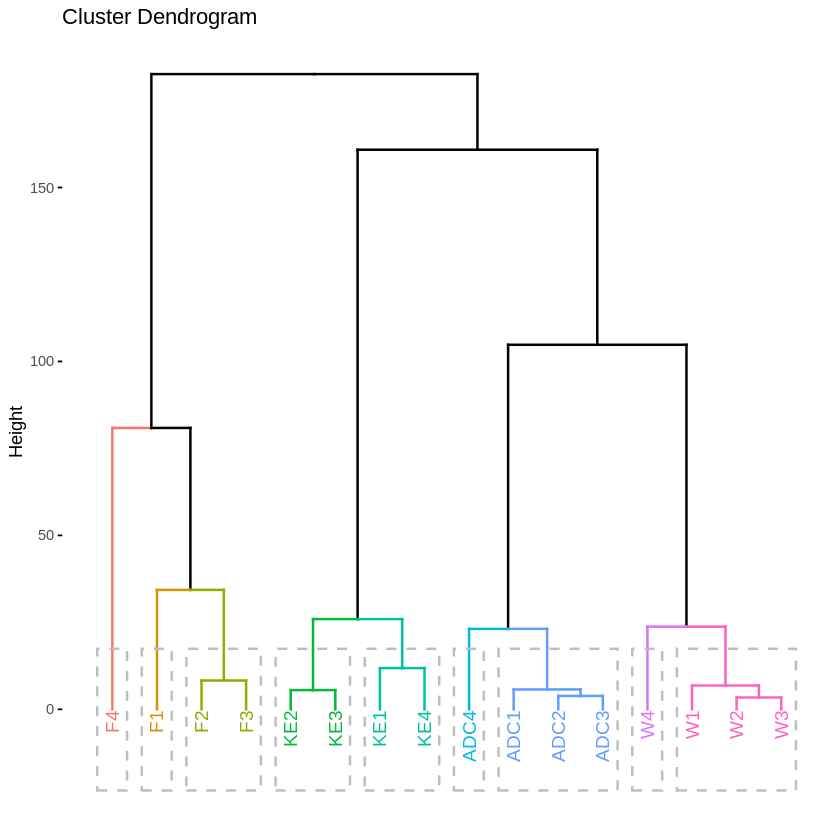

In [196]:
fviz_dend(data_clusts, rect = TRUE) # dendrogam

  cluster size ave.sil.width
1       1    3          0.74
2       2    1          0.00
3       3    1          0.00
4       4    2          0.72
5       5    1          0.00
6       6    2          0.37
7       7    2          0.71
8       8    3          0.74
9       9    1          0.00


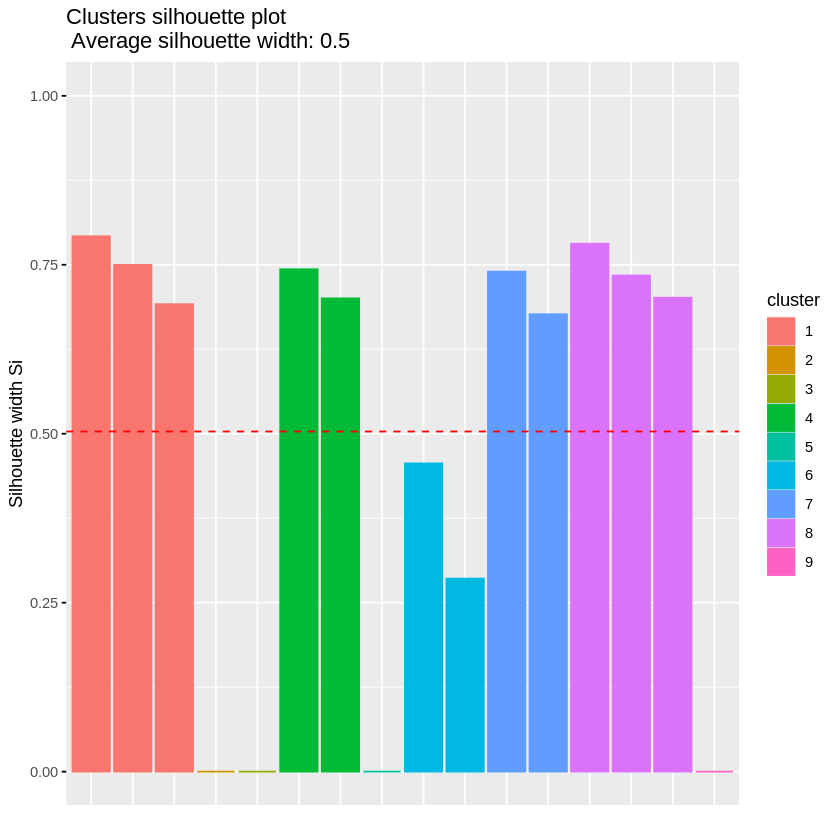

In [182]:
 # Silhouette plot and coefficient quantifies the quality of clustering achieved: 
 
fviz_silhouette(data_clusts) # silhouette plot

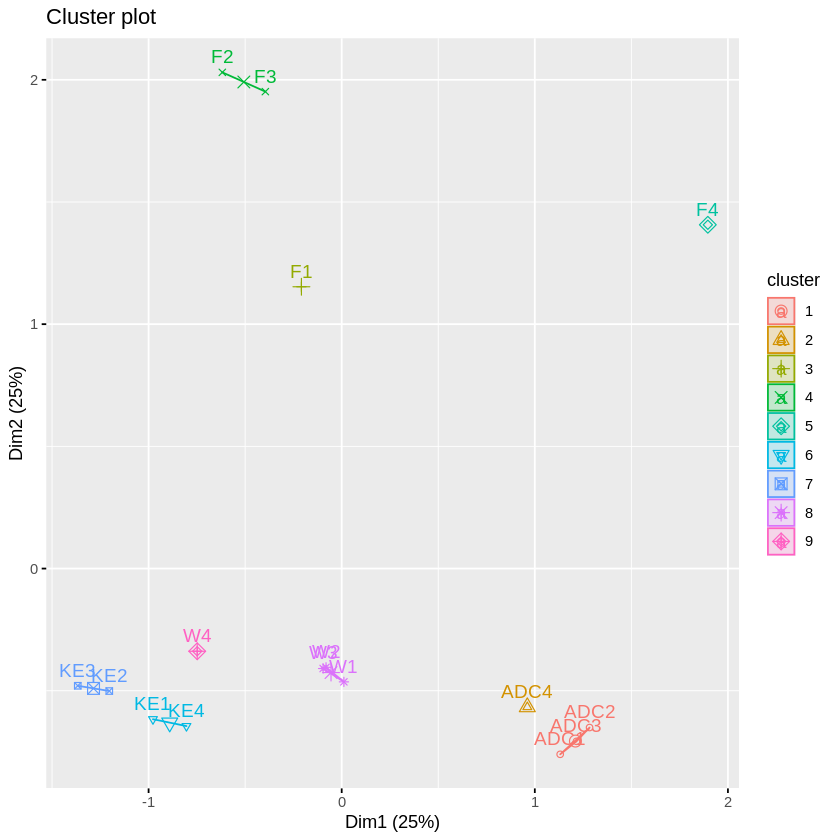

In [183]:
 fviz_cluster(data_clusts)

In [199]:
# the results are not great, let's cut the tree on a different place:

cut_avg <- cutree(data_clusts, k = 4)
cut_avg

ADC1 ADC2 ADC3 ADC4   F1   F2   F3   F4  KE1  KE2  KE3  KE4   W1   W2   W3   W4 
   1    1    1    1    2    2    2    2    3    3    3    3    4    4    4    4

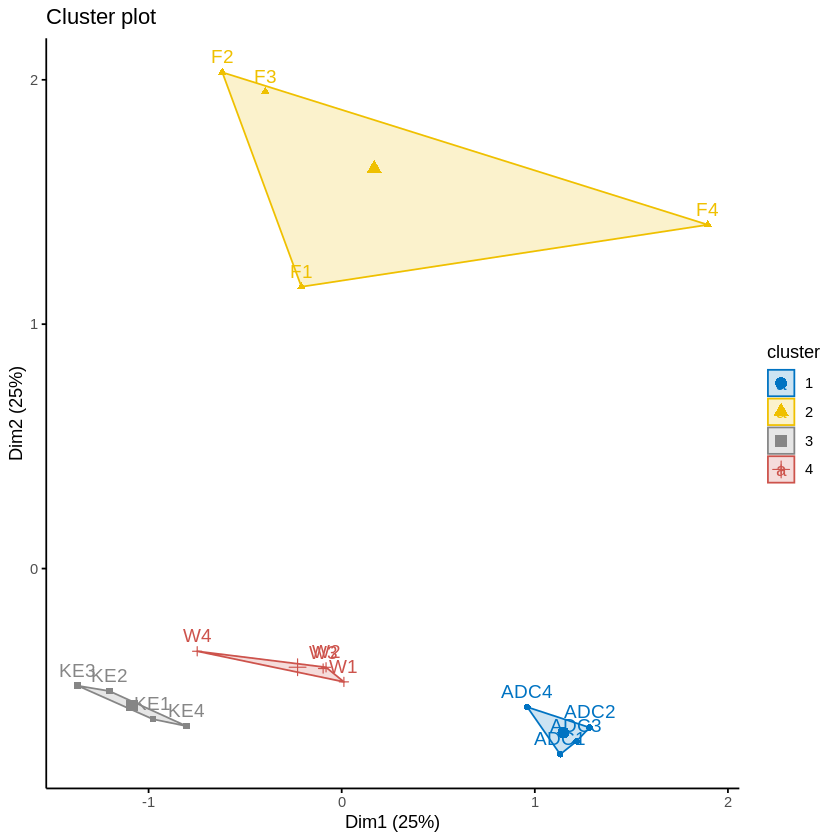

In [200]:
fviz_cluster(list(data = df, cluster = cut_avg), 
             palette = "jco", 
             ggtheme = theme_classic())

## Non-hierarchical clustering

Non-hierarchical clustering tries to find such grouping of objects that maximises or minimises given criterion. One of such methods is K-means clustering.
<br>
![Image](https://miro.medium.com/max/640/1*xkuet4YVglp8KWsK90bfRw.gif)
<br>

from: https://towardsdatascience.com/k-means-clustering-from-a-to-z-f6242a314e9a

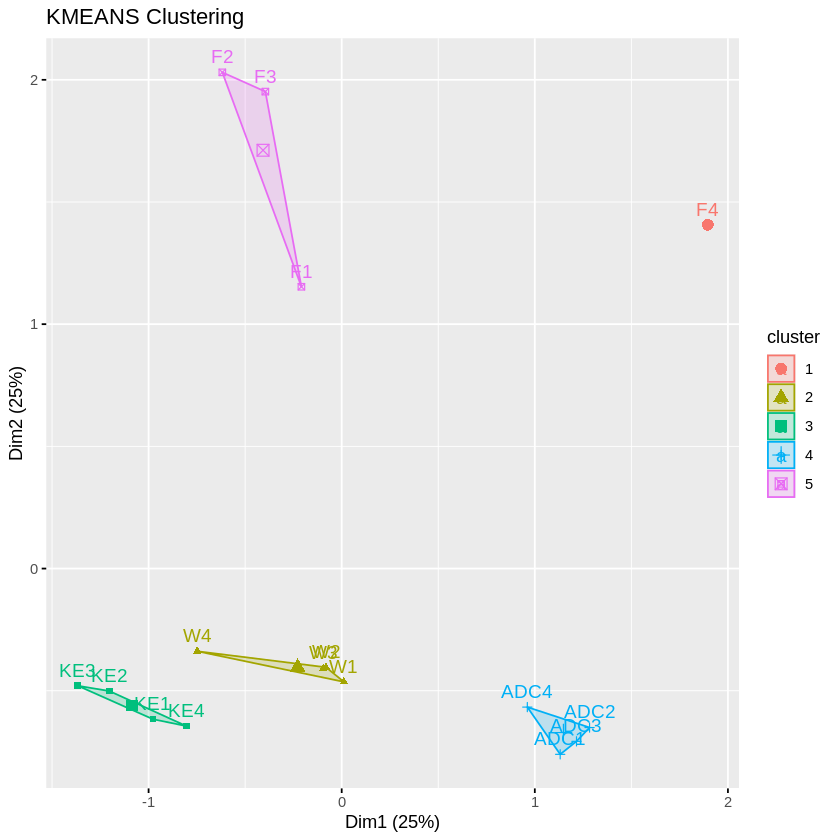

In [190]:
# Lets' try with our data

data_km <- eclust(df, "kmeans", nstart = 6)

[1] "Optimal number of clusters:  5"


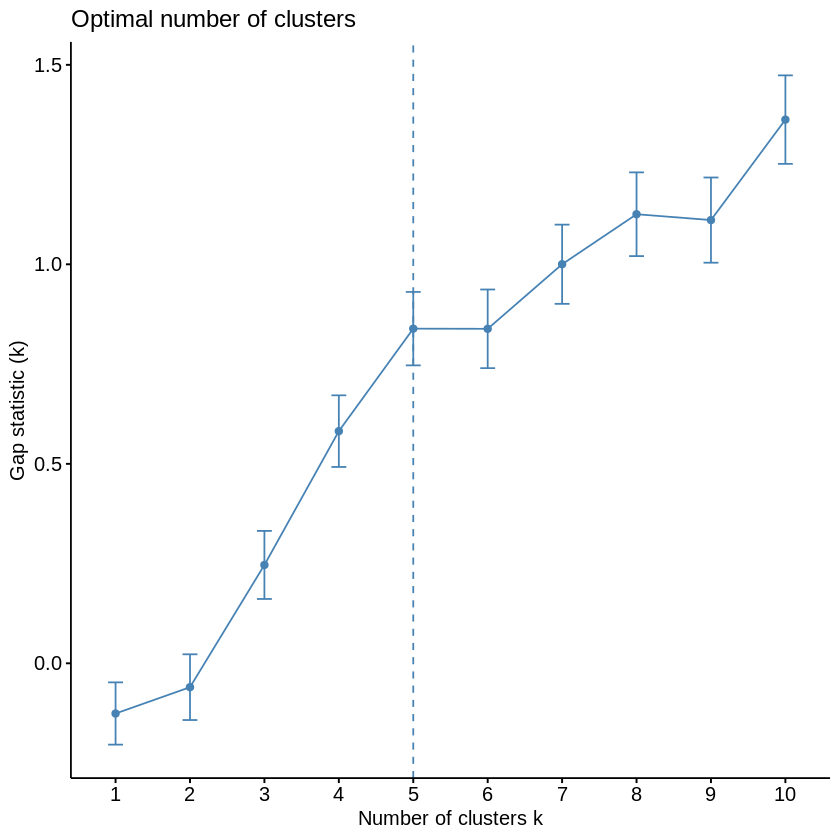

In [191]:
# Gap statistic plot
fviz_gap_stat(data_km$gap_stat)

print(paste('Optimal number of clusters: ', data_km$nbclust))

  cluster size ave.sil.width
1       1    1          0.00
2       2    4          0.77
3       3    4          0.79
4       4    4          0.76
5       5    3          0.66


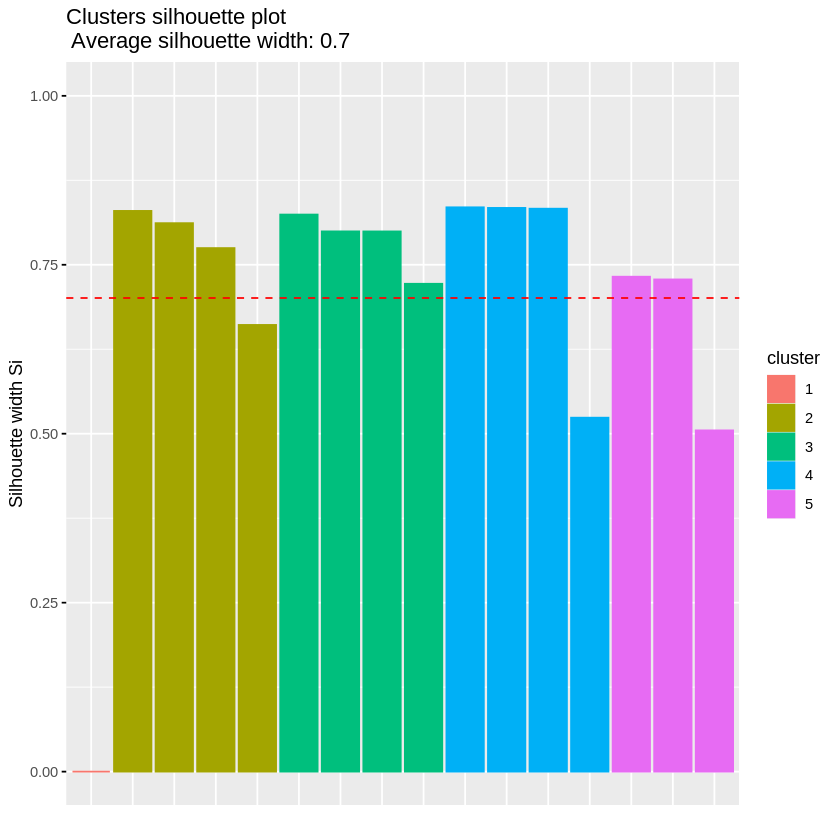

In [192]:
# Silhouette plot
fviz_silhouette(data_km)


What clustering method to use? 


In [207]:
install.packages('clValid')
library("clValid")


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Loading required package: cluster



In [217]:
results <- clValid(df, nClust = 4:8, clMethods = c("hierarchical", "kmeans", "pam"), validation = "internal")

# Summary
summary(results)


Clustering Methods:
 hierarchical kmeans pam 

Cluster sizes:
 4 5 6 7 8 

Validation Measures:
                                 4       5       6       7       8
                                                                  
hierarchical Connectivity  14.2873 20.3635 22.8635 25.6968 29.0302
             Dunn           0.9532  1.0627  1.1489  0.7700  0.7127
             Silhouette     0.5854  0.7008  0.6674  0.6106  0.5504
kmeans       Connectivity  14.2873 20.3635 22.8635 25.6968 29.0302
             Dunn           0.9532  1.0627  1.1489  0.7700  0.7127
             Silhouette     0.5854  0.7008  0.6674  0.6106  0.5504
pam          Connectivity  17.5302 20.3635 22.8635 26.1968 29.0302
             Dunn           0.4596  1.0627  1.1489  0.7127  0.7127
             Silhouette     0.6937  0.7008  0.6674  0.6065  0.5504

Optimal Scores:

             Score   Method       Clusters
Connectivity 14.2873 hierarchical 4       
Dunn          1.1489 hierarchical 6       
Silhouette    0.700

And finaly statistical analysis of the results of chosen clustering method:


In [209]:
install.packages("pvclust")
library(pvclust)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Registered S3 method overwritten by 'pvclust':
  method       from      
  text.pvclust dendextend



In [214]:
res <- pvclust(t(df), method.dist="cor", method.hclust="ward.D2", nboot = 10)
res

Bootstrap (r = 0.5)... Done.


Warning message:
“inappropriate distance matrices are omitted in computation: r =  0.5”


Bootstrap (r = 0.75)... Done.
Bootstrap (r = 1.0)... Done.
Bootstrap (r = 1.25)... Done.



Cluster method: ward.D2
Distance      : correlation

Estimates on edges:

      si    au    bp se.si se.au se.bp      v      c  pchi
1  1.000 1.000 0.587 0.004 0.000 0.094 -2.234  2.015 0.369
2  1.000 1.000 0.482 0.000 0.000 0.096 -2.649  2.693 0.887
3  1.000 1.000 0.587 0.004 0.000 0.094 -2.234  2.015 0.369
4  0.999 1.000 0.443 0.005 0.000 0.094 -2.068  2.210 0.653
5  0.000 0.231 0.725 0.000 0.386 0.080  0.069 -0.666 0.937
6  0.000 0.027 0.612 0.000 0.077 0.088  0.823 -1.107 0.775
7  1.000 1.000 1.000 0.000 0.000 0.000  0.000  0.000 0.000
8  1.000 1.000 0.331 0.002 0.000 0.091 -2.194  2.630 0.558
9  0.988 0.999 0.442 0.070 0.004 0.094 -1.565  1.712 0.215
10 0.999 1.000 0.443 0.005 0.000 0.094 -2.068  2.210 0.653
11 0.000 0.332 0.657 0.000 0.434 0.085  0.015 -0.419 0.911
12 0.771 0.934 0.650 0.382 0.151 0.087 -0.946  0.561 0.420
13 0.815 0.970 0.462 0.365 0.084 0.092 -0.894  0.990 0.200
14 0.815 0.970 0.462 0.365 0.084 0.092 -0.894  0.990 0.200
15 1.000 1.000 1.000 0.000 0.000 0.000  

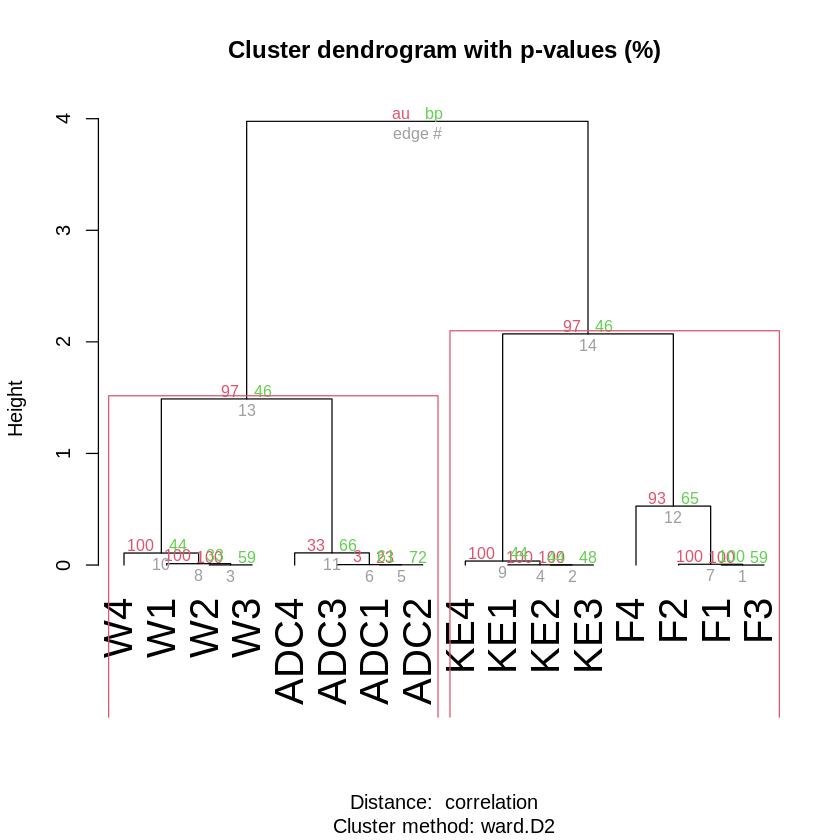

In [215]:
plot(res, hang = -1, cex = 2)
pvrect(res)